# Baseball case study

## Data description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

## Importing modules

In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

## Reading csv file

In [128]:
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
df.shape

(30, 17)

In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## Checking null values

In [9]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

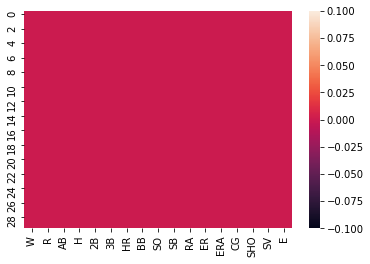

In [10]:
sns.heatmap(df.isnull())

There is no null value present in the data.

## Dependent variable visualization: Win

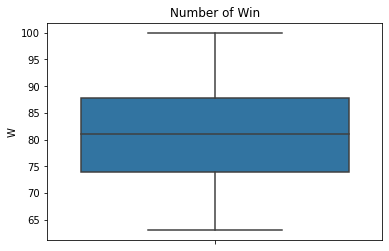

count     30.000000
mean      80.966667
std       10.453455
min       63.000000
25%       74.000000
50%       81.000000
75%       87.750000
max      100.000000
Name: W, dtype: float64


In [13]:
plt.title('Number of Win')
sns.boxplot(y = df.W)
plt.show()
print(df.W.describe())

According to the boxplot, wins field has an average of 80 and median around 81 with the most number of wins is 87 and leat number of wins is 70.

## Checking the distribution plot of the dependent variable 

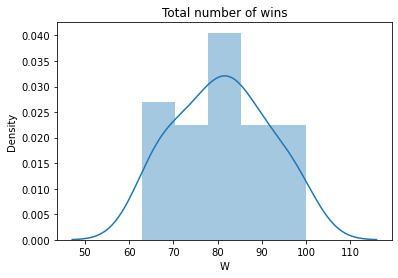

In [14]:
plt.title('Total number of wins')
sns.distplot(df.W)
plt.show()

Since we have median>mode, then our distribution in negatively asymmetric, as we can see in the above histogram.

## Visualization of independent variable

#### Check the linear relationship between the dependent variable 'W'(win) and the numerical independent column

Draw XY scatter plot, and check are they linear or not?

In [16]:
import scipy
from scipy.stats.stats import pearsonr

def pairplot(x_axis, y_axis):
    sns.pairplot(df, x_vars=x_axis, y_vars=y_axis, height=4, aspect=1, kind='scatter')
    plt.show()

In [24]:
# assigning dependent variable

y_vars = 'W'

#### W(win) vs R(runs)-AB(at bats)-H(hits)

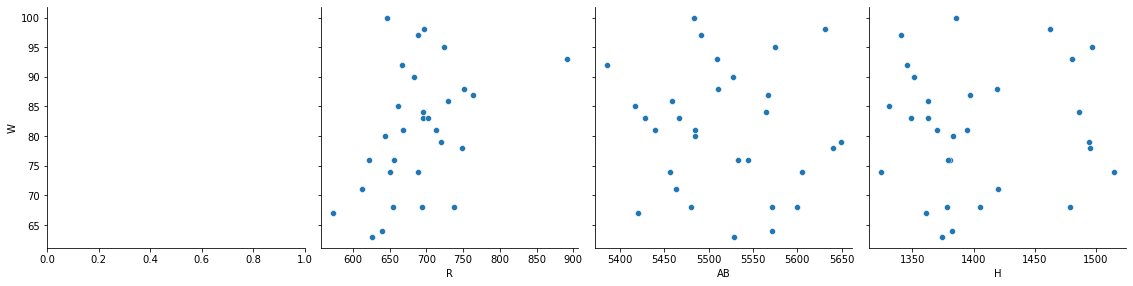


 Coeffiecient of correlation between Win and Runs: 43.07505325312717 %

 Coeffiecient of correlation between Win and At Bats: -8.794663528380916 %

 Coeffiecient of correlation between Win and Hits: 3.761244412299247 %


In [45]:
x_vars = ['','R' ,'AB', 'H']
pairplot(x_vars, y_vars)

p1 = df['R']
p2 = df['AB']
p3 = df['H']

pearson_coeff, p_value = pearsonr(p1, df['W'])
print('\n Coeffiecient of correlation between Win and Runs:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2, df['W'])
print('\n Coeffiecient of correlation between Win and At Bats:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3, df['W'])
print('\n Coeffiecient of correlation between Win and Hits:', pearson_coeff*100,'%')

Runs are more related than Bats and Hits which is more spread out but positive. We can make sure of this by looking at the Coefficient of Correlation.

##### Note: While plotting the pairplot the first graph is always empty wheather i assing a variable into it or not, so i decided to pass an empty string in x_vars so that we can visualize our realtionship.

#### W(wins) vs  (2B)Doubles, (3B)Triples, (HR)Homeruns 

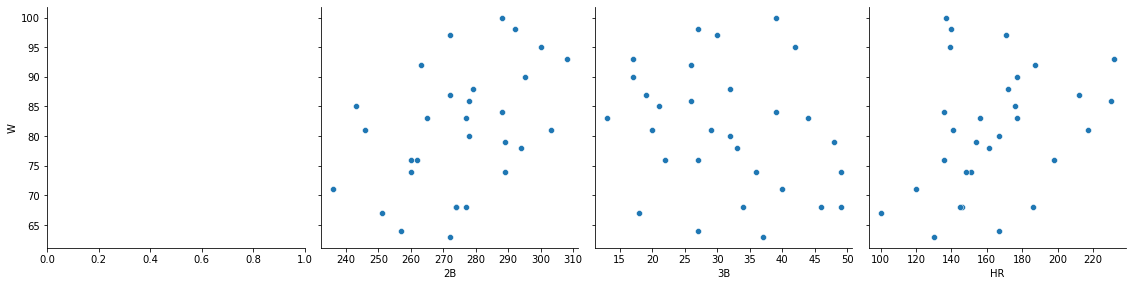


 Coeffiecient of correlation between Win and Doubles: 42.779686995902665 %

 Coeffiecient of correlation between Win and Triples: -25.111772827491556 %

 Coeffiecient of correlation between Win and Home Runs: 30.74073773725719 %


In [46]:
x_vars = ['','2B', '3B', 'HR']
pairplot(x_vars, y_vars)

p1 = df['2B']
p2 = df['3B']
p3 = df['HR']

pearson_coeff, p_value = pearsonr(p1, df['W'])
print('\n Coeffiecient of correlation between Win and Doubles:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2, df['W'])
print('\n Coeffiecient of correlation between Win and Triples:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3, df['W'])
print('\n Coeffiecient of correlation between Win and Home Runs:', pearson_coeff*100,'%')

Doubles are positively correlated than Home Runs and Triples are negatively correlated and more spread out.

#### W(wins) vs BB(Walks), SO(Strikeouts), SB(Stolen Bases)

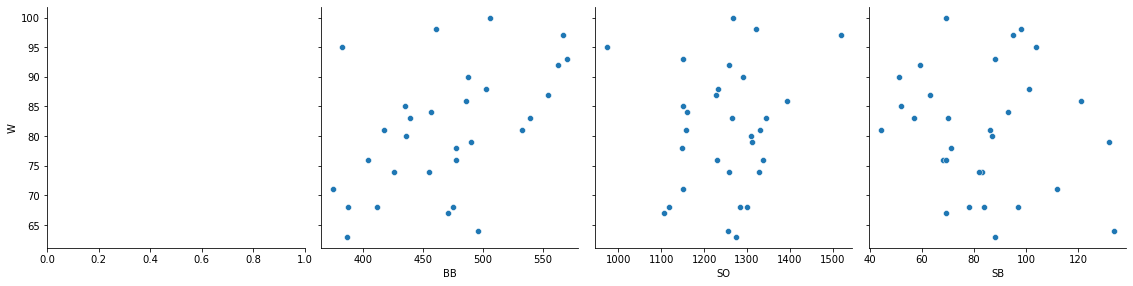


 Coeffiecient of correlation between Win and Walks: 48.43416952504984 %

 Coeffiecient of correlation between Win and Strikeouts: 11.184973144299866 %

 Coeffiecient of correlation between Win and Home Stolen Bases: -15.723407818337542 %


In [47]:
x_vars = ['','BB', 'SO', 'SB']
pairplot(x_vars, y_vars)

p1 = df['BB']
p2 = df['SO']
p3 = df['SB']

pearson_coeff, p_value = pearsonr(p1, df['W'])
print('\n Coeffiecient of correlation between Win and Walks:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2, df['W'])
print('\n Coeffiecient of correlation between Win and Strikeouts:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3, df['W'])
print('\n Coeffiecient of correlation between Win and Home Stolen Bases:', pearson_coeff*100,'%')

Here walks are positive correlated and more spread out. Strikeout and Stolen Bases are not correlated.

#### W(wins) vs RA(Runs Allowed), ER(Earned Runs), ERA(Earned Run Average)

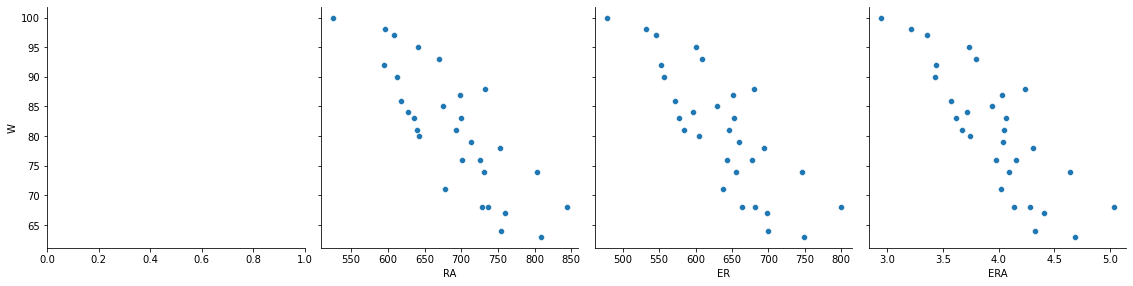


 Coeffiecient of correlation between Win and Runs Allowed: -81.29519004236909 %

 Coeffiecient of correlation between Win and Earned Runs: -80.94347520763398 %

 Coeffiecient of correlation between Win and Home Earned Run Average: -81.9599712315947 %


In [48]:
x_vars = ['','RA', 'ER', 'ERA']
pairplot(x_vars, y_vars)

p1 = df['RA']
p2 = df['ER']
p3 = df['ERA']

pearson_coeff, p_value = pearsonr(p1, df['W'])
print('\n Coeffiecient of correlation between Win and Runs Allowed:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2, df['W'])
print('\n Coeffiecient of correlation between Win and Earned Runs:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3, df['W'])
print('\n Coeffiecient of correlation between Win and Home Earned Run Average:', pearson_coeff*100,'%')

Here all these there variables negatively correlated.

#### W(wins) vs SHO(Shutouts)-SV(Saves)-E(Errors)

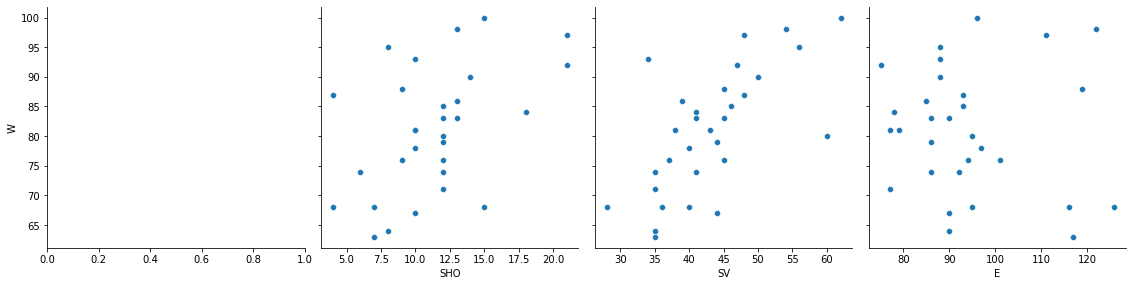


 Coeffiecient of correlation between Win and Shutouts: 47.1805161489654 %

 Coeffiecient of correlation between Win and Saves: 66.65296188226412 %

 Coeffiecient of correlation between Win and Home Error: -8.948461968513524 %


In [50]:
x_vars = ['','SHO', 'SV', 'E']
pairplot(x_vars, y_vars)

p1 = df['SHO']
p2 = df['SV']
p3 = df['E']

pearson_coeff, p_value = pearsonr(p1, df['W'])
print('\n Coeffiecient of correlation between Win and Shutouts:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2, df['W'])
print('\n Coeffiecient of correlation between Win and Saves:', pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3, df['W'])
print('\n Coeffiecient of correlation between Win and Home Error:', pearson_coeff*100,'%')

Here Shutouts and Saves are more correlated than Error but Shutouts are more spread out as compare to Saves.

#### Conclusion

(+) Positively correlated variables with Win: Runs, Doubles, Walks, Shutouts, Saves

(-)Neagatively correlated variables with Wins: Runs Allowed, Earned Runs, Earned Run Average.

These variables should be kept for a better model, and the other variables should be ignored as they are not correlated with Wins.

## Checking for Skewness in data

In [129]:
df_new = df.drop(['AB', 'H', '3B', 'HR', 'SO', 'SB', 'E'], axis=1)

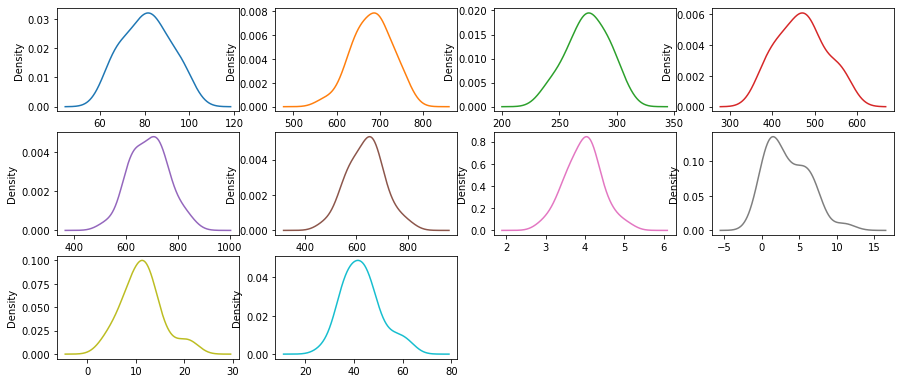

In [188]:
df_new.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=False, figsize=(15,11))
plt.show()

Here we can see the data is symmetric. There is not that much skewness is present in order to remove it.

## Checking Outliers

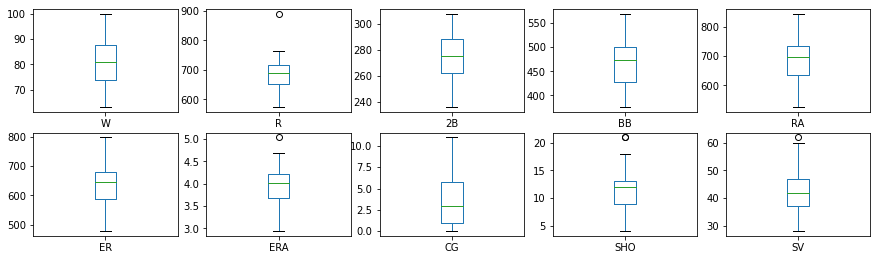

In [131]:
df_new.plot(kind='box', subplots=True, layout=(5,5), sharex=False, legend=False, figsize=(15,11))
plt.show()

Here we can see that outliers are present in R,ERA,SHO,SV. But the outliers in ERA,SHO,SV are close to whiskers as compare to R. So we will replace the outliers present in R.

In [132]:
Q1 = np.percentile(df_new['R'], 25, interpolation='midpoint')
Q3 = np.percentile(df_new['R'], 75, interpolation='midpoint')

IQR = stats.iqr(df_new['R'], interpolation='midpoint')
print("InterQuartile Range is:", IQR)

up_lim = Q3+1.5*IQR
lo_lim = Q1-1.5*IQR

print("Upper Limit:", up_lim)
print("Lower Limit:", lo_lim)

InterQuartile Range is: 64.0
Upper Limit: 812.5
Lower Limit: 556.5


In [133]:
outliers = []
for x in df_new['R']:
    if((x > up_lim) or (x < lo_lim)):
        outliers.append(x)

print(outliers)
print('Number of outliers present in R column:', len(outliers))

[891]
Number of outliers present in R column: 1


In [134]:
value = df_new['R'].median()
df_new['R'] = np.where(df_new['R'] == 891, value, df_new['R'])

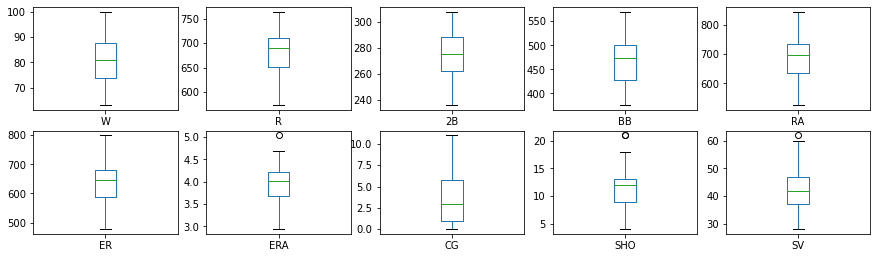

In [135]:
df_new.plot(kind='box', subplots=True, layout=(5,5), sharex=False, legend=False, figsize=(15,11))
plt.show()

<Figure size 1440x360 with 0 Axes>

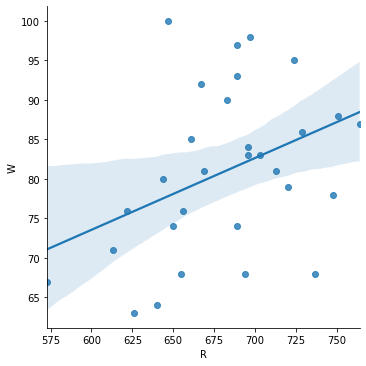

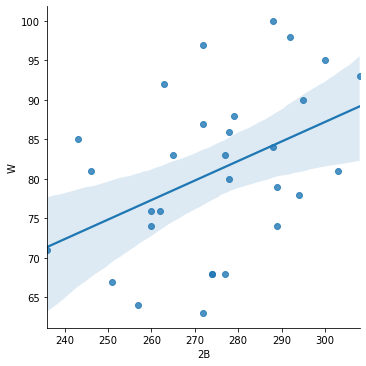

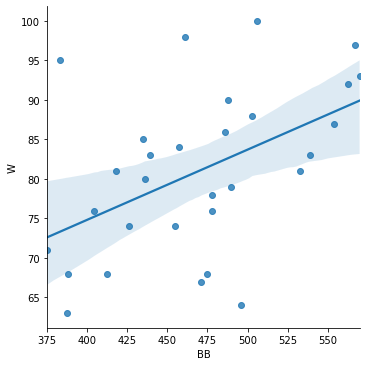

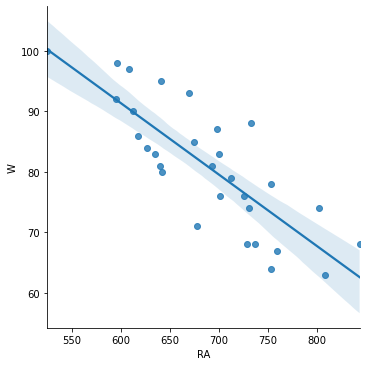

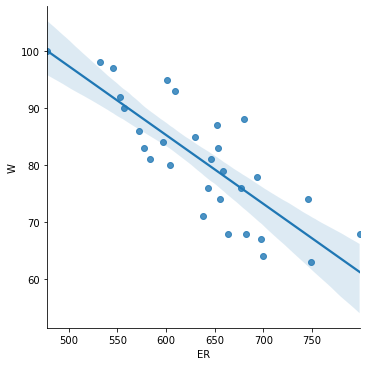

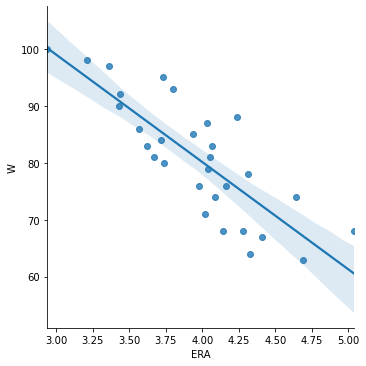

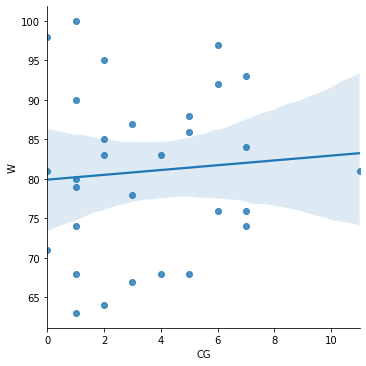

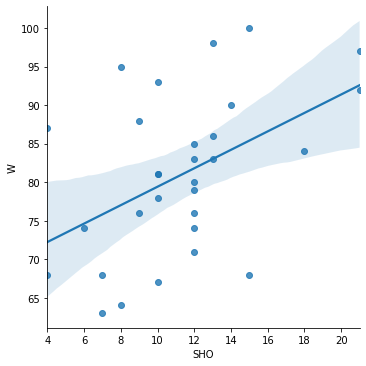

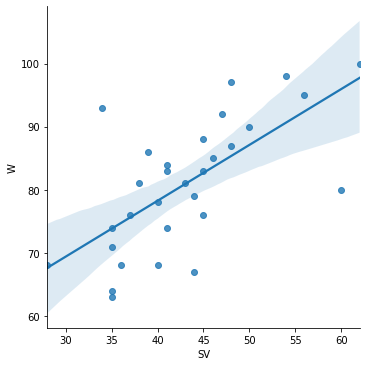

In [151]:
# this is a linear model plot

plt.figure(figsize=(20, 5))
sns.lmplot(data=df_new, x='R', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='2B', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='BB', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='RA', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='ER', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='ERA', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='CG', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='SHO', y='W', fit_reg=True)
sns.lmplot(data=df_new, x='SV', y='W', fit_reg=True)

## Baseline algorithm test

There are a few regression algorithms I can use. I prefer to line the usable regression algorithms up and run them using a standard set of data. I check the negative mean square error of each run. The given data set is divided into training set and testing set. The test set is 30% of the provided data set.

In [152]:
x = df.drop('W', axis=1)
y = df['W']

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

The differing scales of the raw data may impact these algorithms. Part of a requirement for a standardised data set is to have each attribute have a mean value of zero and a standard deviation of 1. I implement standardisation using pipelines. I then use cross-validation to validate performance of algorithms in totality.

In [160]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLasso', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -147.904643 (111.306668)
ScaledLasso: -19.035891 (17.109070)
ScaledEN: -22.513040 (19.617797)
ScaledKNN: -44.400000 (33.670918)
ScaledCART: -111.150000 (79.551257)
ScaledGBM: -103.385557 (95.445769)


From the output above, it looks like the Lasso performs the best using a scaled version of the data. From this point onward, I will build the regression algorithm using the Lasso. The LASSO will be tested with a few n_estimators using the GridSearchCV function.

In [171]:
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
param_grid = dict()
param_grid['alpha'] = np.arange(0, 1, 0.01)
param_grid['selection'] = ['cyclic', 'random']
model = Lasso()
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-65.852125 (48.383696) with: {'alpha': 0.0, 'selection': 'cyclic'}
-55.487203 (37.301068) with: {'alpha': 0.0, 'selection': 'random'}
-48.981560 (36.161890) with: {'alpha': 0.01, 'selection': 'cyclic'}
-44.575344 (30.131417) with: {'alpha': 0.01, 'selection': 'random'}
-40.651034 (28.156929) with: {'alpha': 0.02, 'selection': 'cyclic'}
-40.260709 (27.870331) with: {'alpha': 0.02, 'selection': 'random'}
-34.905677 (23.810298) with: {'alpha': 0.03, 'selection': 'cyclic'}
-35.066525 (23.729807) with: {'alpha': 0.03, 'selection': 'random'}
-32.005360 (21.224416) with: {'alpha': 0.04, 'selection': 'cyclic'}
-31.943680 (21.109966) with: {'alpha': 0.04, 'selection': 'random'}
-29.403573 (19.430137) with: {'alpha': 0.05, 'selection': 'cyclic'}
-29.349221 (19.328858) with: {'alpha': 0.05, 'selection': 'random'}
-27.672336 (18.064598) with: {'alpha': 0.06, 'selection': 'cyclic'}
-27.725530 (18.116106) with: {'alpha': 0.06, 'selection': 'random'}
-26.177732 (16.879180) with: {'alpha': 0.07, 'sele

## Building the model with best parameter

Text(0, 0.5, 'Predcited Values')

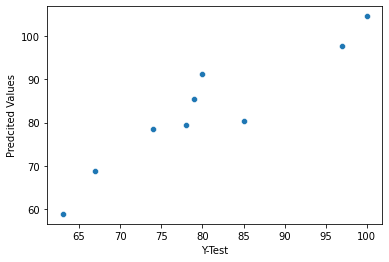

In [190]:
l = Lasso(alpha=0.29, selection='random')
l.fit(x_train, y_train)
pred = l.predict(x_test)
sns.scatterplot(y_test, pred)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

## Checking how much our predictions are correct

In [191]:
pred = l.predict(x_test)

In [192]:
predictions = pd.DataFrame({"Predictions":pred, "Real Value":y_test})

In [193]:
predictions.round(2)

,Predictions,Real Value
27,85.57,79
15,104.55,100
23,68.79,67
17,97.61,97
8,91.12,80
9,79.41,78
28,78.42,74
24,58.94,63
12,80.49,85


## Saving our model

In [194]:
import joblib
joblib.dump(l, 'baseball.pkl')

['baseball.pkl']

## Loading the save model

In [195]:
save = joblib.load('baseball.pkl')
prediction = save.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))

Mean Absolute Error: 4.337136883655253
Mean Squared Error: 27.70850273632298
Root Mean Squared Error: 5.263886656865151


In [196]:
prediction

array([ 85.56890728, 104.54887837,  68.79178385,  97.60709529,
        91.11693391,  79.40773648,  78.42468133,  58.94142385,
        80.49036071])